# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [69]:
17

17

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [70]:
import numpy as np
import pandas as pd
import time

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from scipy import stats


In [71]:
df = pd.read_csv("C:\\Users\\Simon\\Downloads\\module17_starter\\data\\bank-additional-full.csv", sep = ';')

In [72]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [73]:
#This dataset is clean syntactically, but semantically dirty. The work is in handling the meaning, not fixing nulls.

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [75]:
#The Objective of this task is to find the best machine learning model classifier to predict whether a bank
#customer will subscribe to a term deposit after a marketing call, so campaigns can be better targeted.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [76]:
# Separate features from target
X = df.drop(columns=["y"])

# ----------------------------
# 1) Drop leakage feature
# ----------------------------
X = X.drop(columns=["duration"])

# ----------------------------
# 2) Fix pdays sentinel value (999 = never contacted)
# ----------------------------
X["previously_contacted"] = (X["pdays"] != 999).astype(int)
X["pdays_clean"] = X["pdays"].replace(999, np.nan)

# Drop original pdays
X = X.drop(columns=["pdays"])

# ----------------------------
# 3) Cyclical encoding for month
# ----------------------------
month_map = {
    "jan": 1, "feb": 2, "mar": 3, "apr": 4, "may": 5, "jun": 6,
    "jul": 7, "aug": 8, "sep": 9, "oct": 10, "nov": 11, "dec": 12
}

X["month_num"] = X["month"].astype(str).str.lower().map(month_map)

X["month_sin"] = np.sin(2 * np.pi * X["month_num"] / 12.0)
X["month_cos"] = np.cos(2 * np.pi * X["month_num"] / 12.0)

# Drop original month columns
X = X.drop(columns=["month", "month_num"])

# ----------------------------
# 4) Cyclical encoding for day of week
# ----------------------------
dow_map = {"mon": 1, "tue": 2, "wed": 3, "thu": 4, "fri": 5}

X["dow_num"] = X["day_of_week"].astype(str).str.lower().map(dow_map)

X["dow_sin"] = np.sin(2 * np.pi * X["dow_num"] / 5.0)
X["dow_cos"] = np.cos(2 * np.pi * X["dow_num"] / 5.0)

# Drop original day_of_week columns
X = X.drop(columns=["day_of_week", "dow_num"])

# ----------------------------
# Final engineered feature set
# ----------------------------
print(X.head())


   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

   campaign  previous  ... cons.price.idx  cons.conf.idx  euribor3m  \
0         1         0  ...         93.994          -36.4      4.857   
1         1         0  ...         93.994          -36.4      4.857   
2         1         0  ...         93.994          -36.4      4.857   
3         1         0  ...         93.994          -36.4      4.857   
4         1         0  ...         93.994          -36.4      4.857   

   nr.employed  previously_contacted  pdays_clean  month_sin  month_cos  \
0       5191.0                     0     

Total samples: 41188
Yes rate: 0.11265417111780131
------------------------------------------------------------
T-test: Age difference between subscribers vs non-subscribers
Mean age (yes): 40.91
Mean age (no): 39.91
t-statistic: 4.7795
p-value: 1.8047932698425662e-06
Interpretation: Age differs significantly between groups.

Chi-square test: poutcome vs subscription (y)
chi2: 4230.5238
p-value: 0.0
Interpretation: Subscription outcome depends on previous campaign outcome.

T-test: Euribor rate difference between subscribers vs non-subscribers
Mean euribor3m (yes): 2.123
Mean euribor3m (no): 3.811
t-statistic: -62.5799
p-value: 0.0
Interpretation: Euribor rates differ significantly across outcomes.



In [62]:
# 1) Convert "unknown" -> NaN for selected columns (so we can impute)
unknown_cols = ["job", "marital", "education", "default", "housing", "loan"]
for col in unknown_cols:
    if col in X.columns:
        X[col] = X[col].replace("unknown", np.nan)

# 2) Binary encode yes/no columns (unknown already converted to NaN above)
binary_cols = ["default", "housing", "loan"]
for col in binary_cols:
    if col in X.columns:
        X[col] = X[col].map({"yes": 1, "no": 0})

# 3) Binary encode contact (cellular/telephone)
if "contact" in X.columns:
    X["contact"] = X["contact"].map({"cellular": 1, "telephone": 0})

# 4) Identify column types AFTER engineering/encoding
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = [c for c in X.columns if c not in numeric_cols]

print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)

# 5) Build preprocessors
numeric_preprocess = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
])

categorical_preprocess = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore")),
])

# 6) Combine into one ColumnTransformer
preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_preprocess, numeric_cols),
        ("cat", categorical_preprocess, categorical_cols),
    ],
    remainder="drop"
)



Numeric columns: ['age', 'default', 'housing', 'loan', 'contact', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'previously_contacted', 'pdays_clean', 'month_sin', 'month_cos', 'dow_sin', 'dow_cos']
Categorical columns: ['job', 'marital', 'education', 'poutcome']


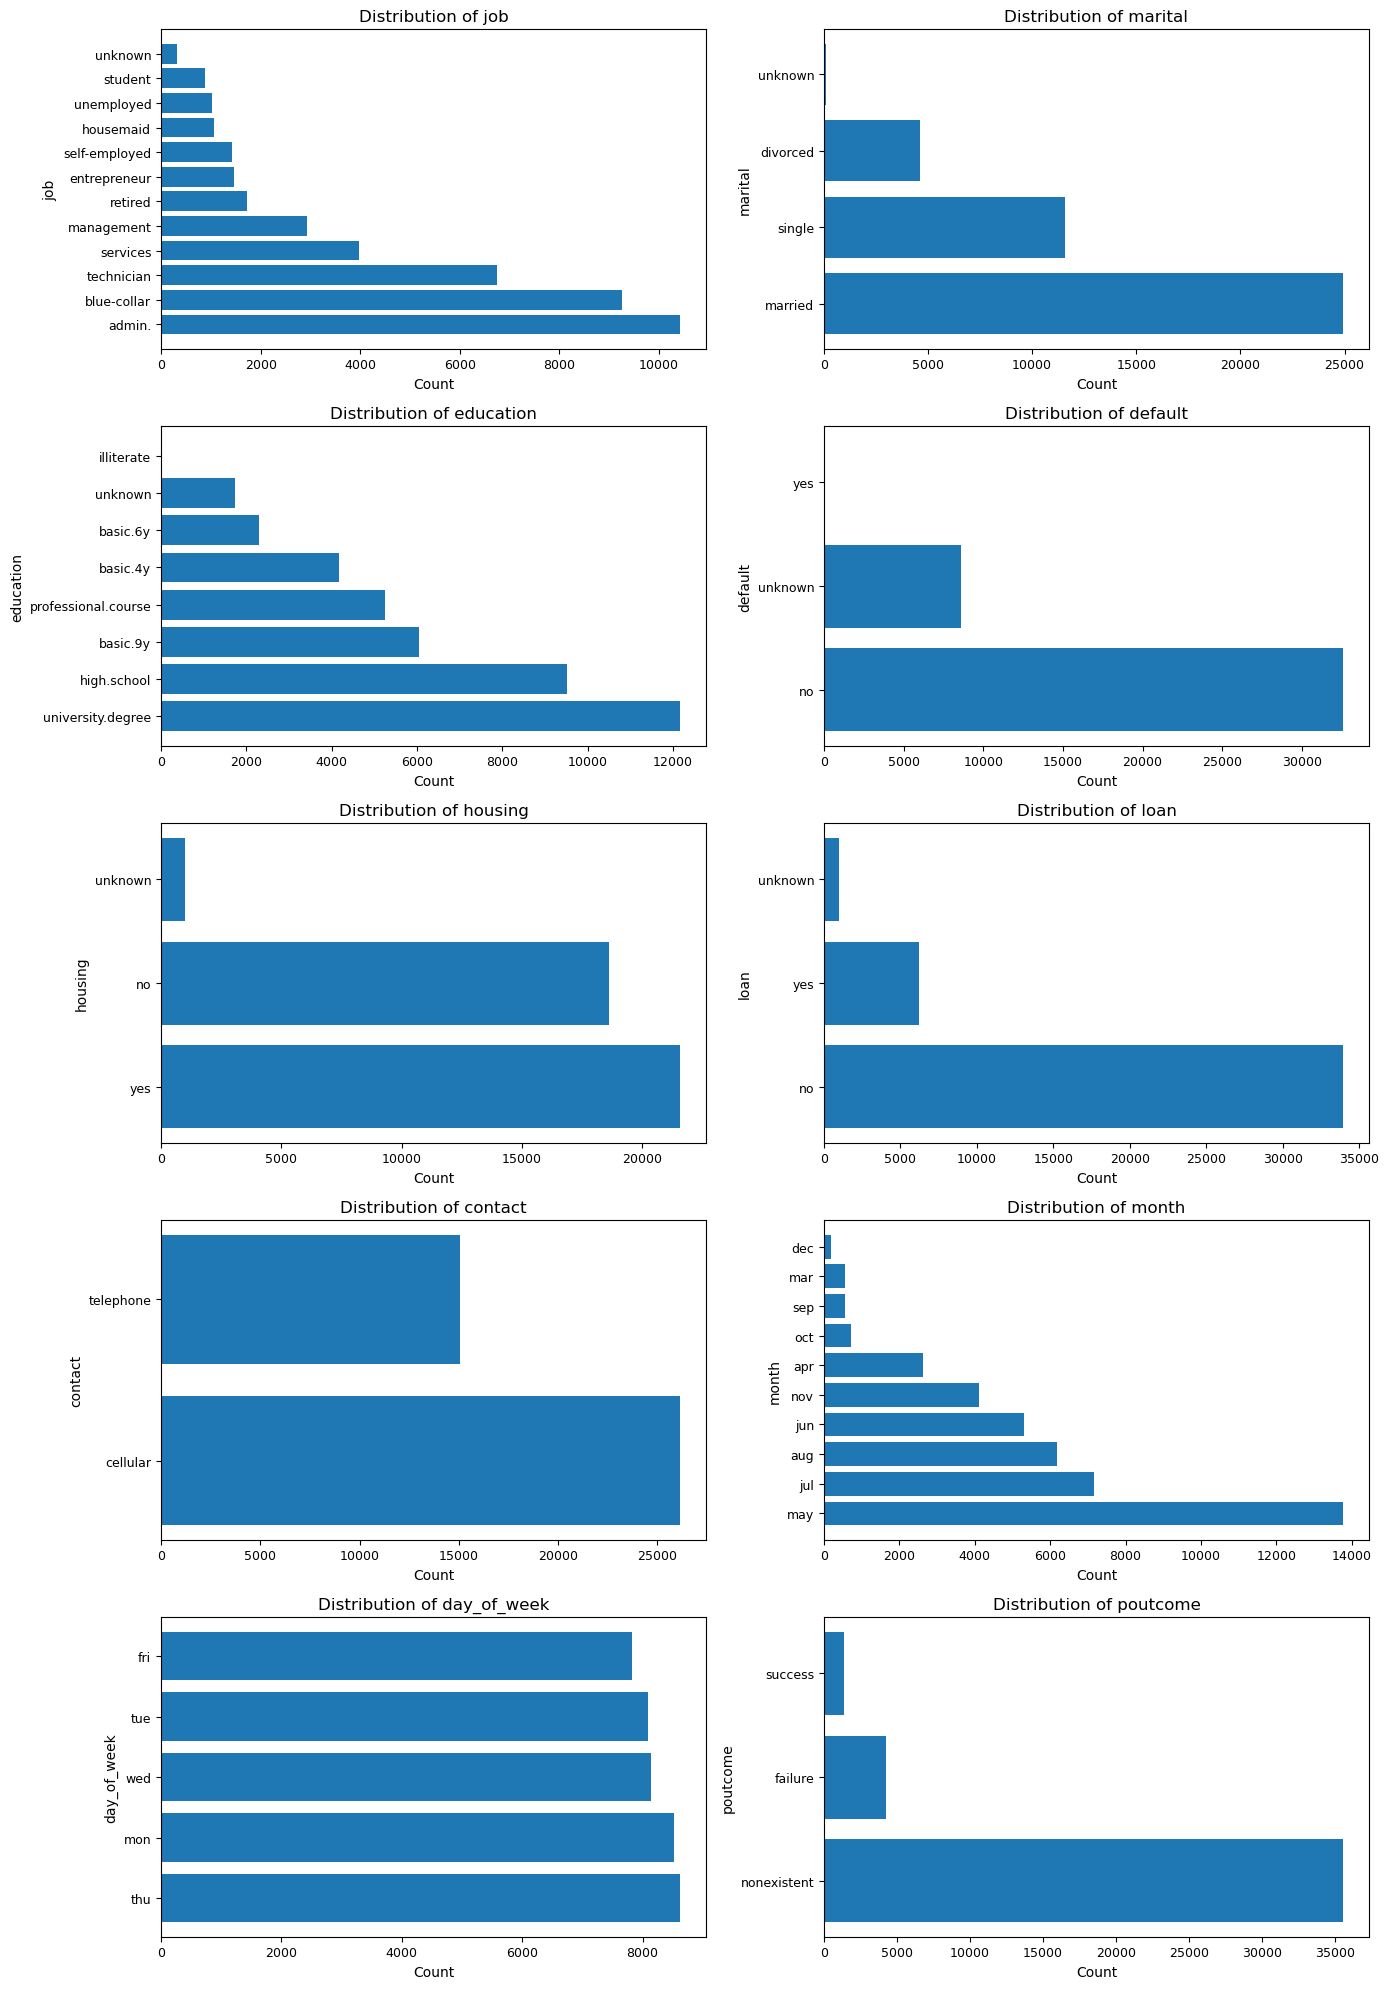

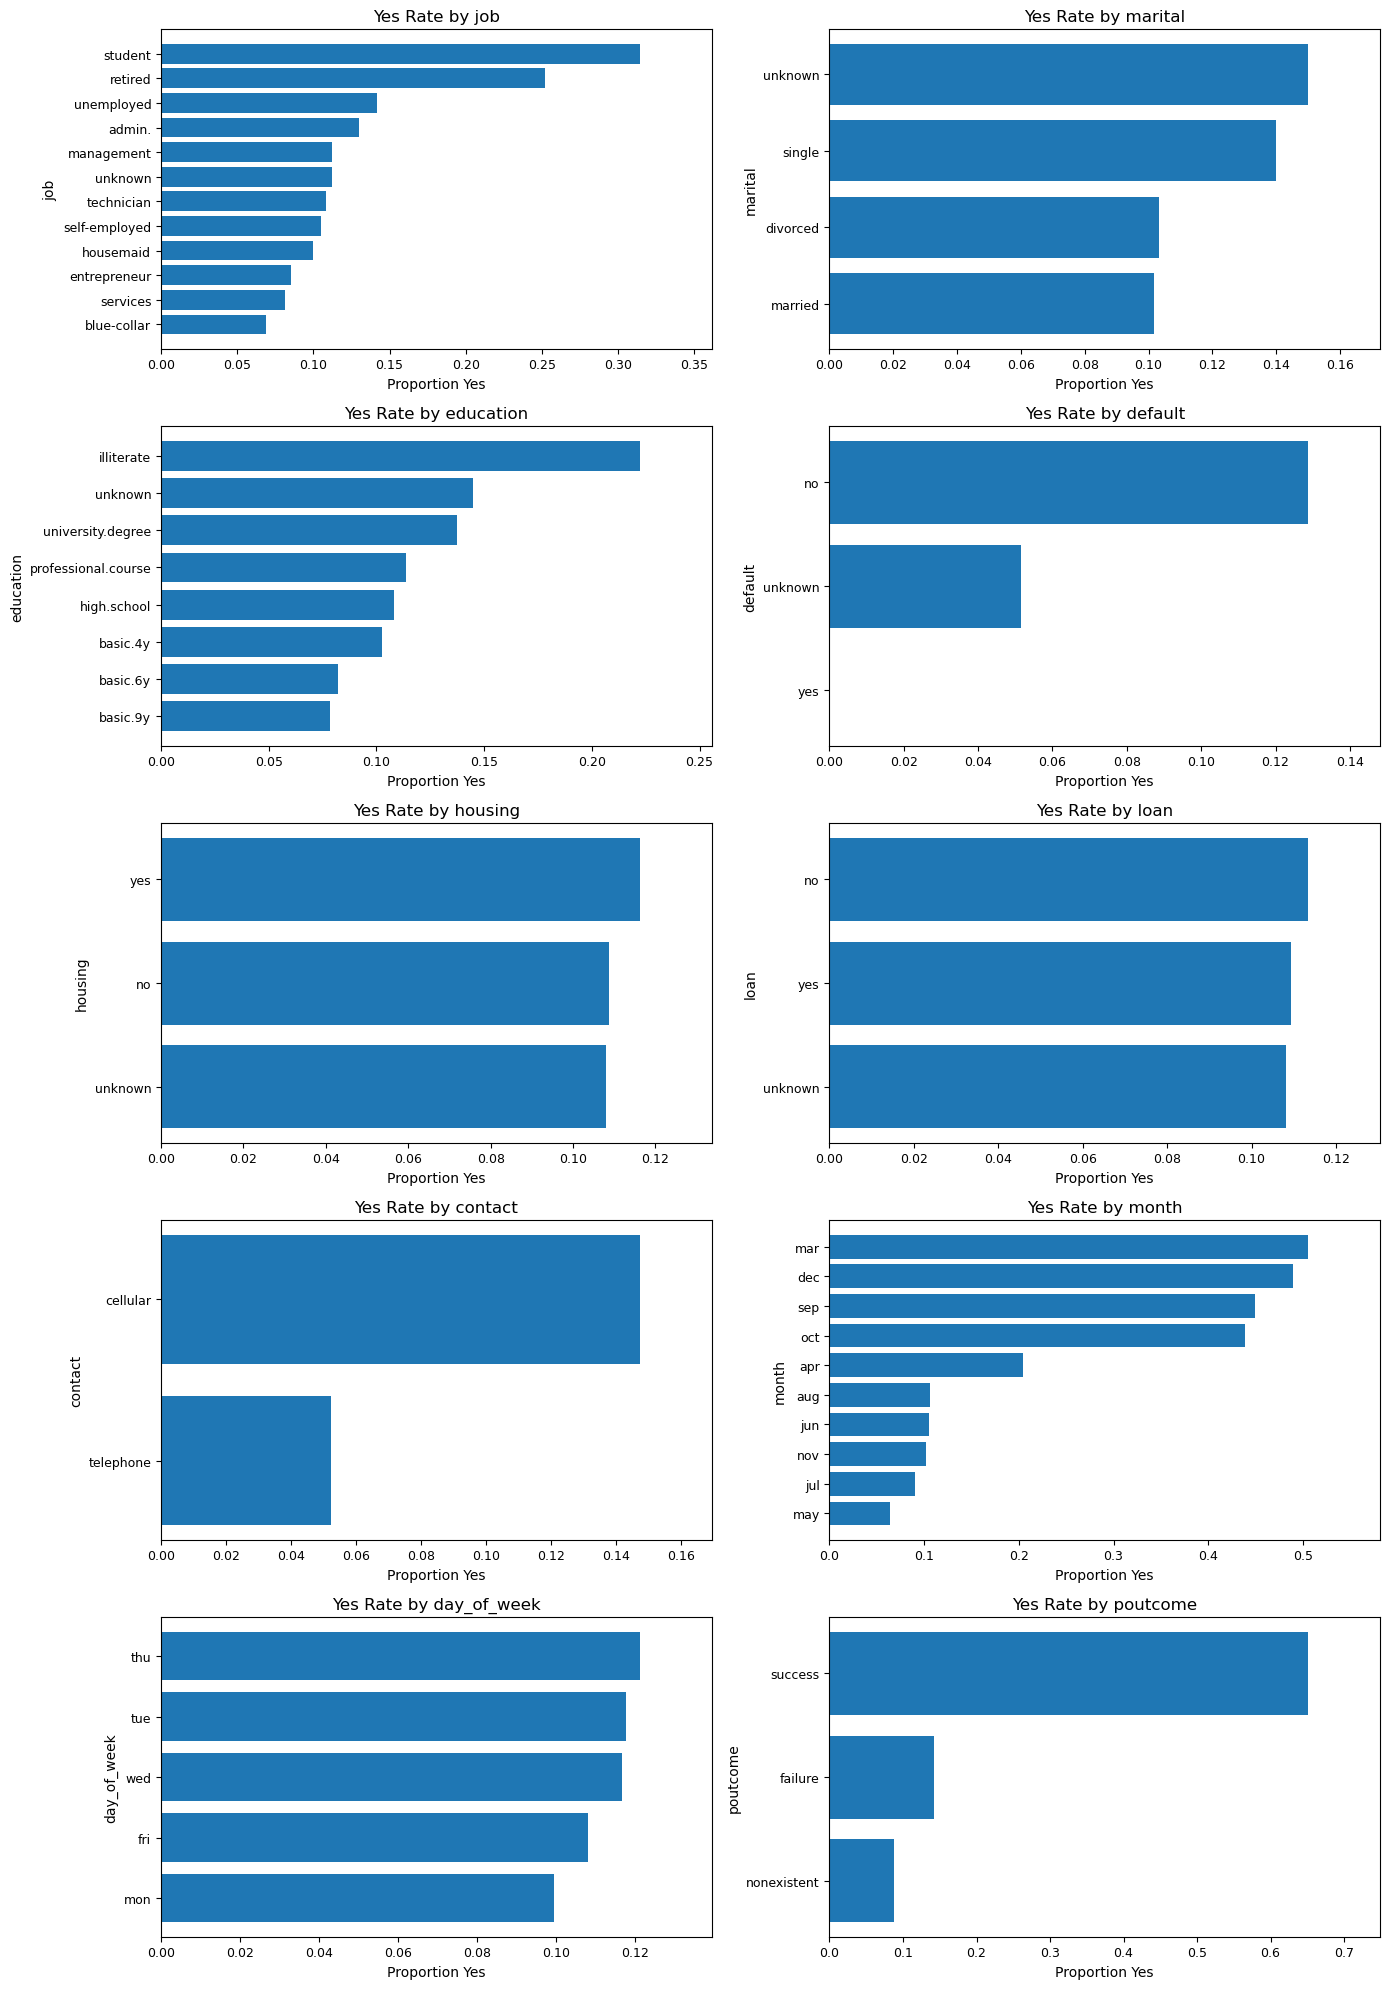

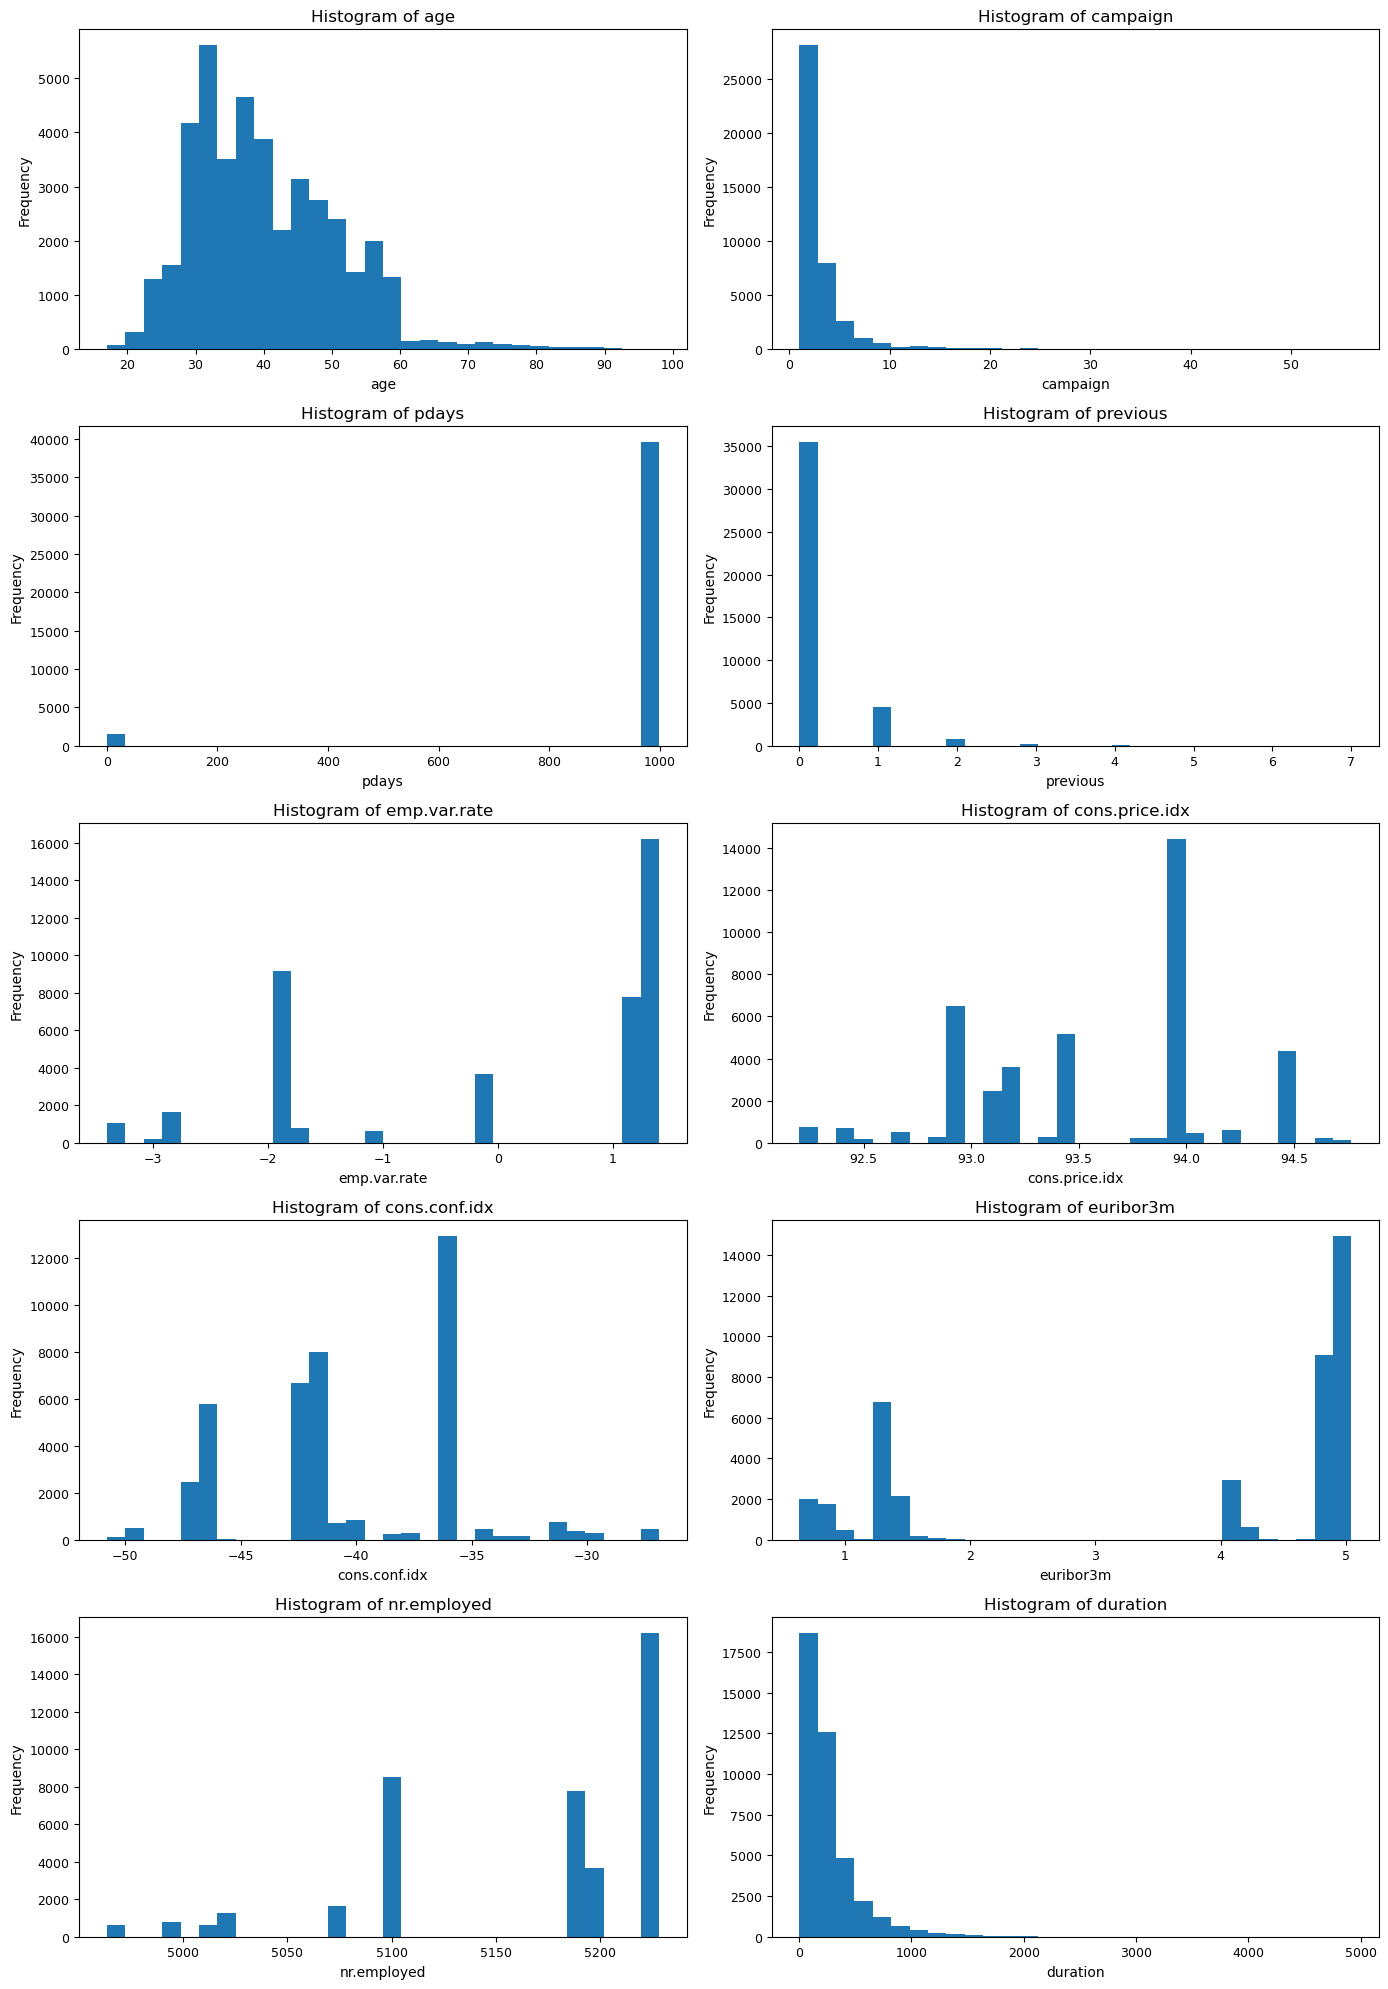

C:\Users\Simon\AppData\Local\Temp\ipykernel_18548\3643706332.py:147: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot([a, b], labels=["no", "yes"], showfliers=False)
C:\Users\Simon\AppData\Local\Temp\ipykernel_18548\3643706332.py:147: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot([a, b], labels=["no", "yes"], showfliers=False)
C:\Users\Simon\AppData\Local\Temp\ipykernel_18548\3643706332.py:147: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot([a, b], labels=["no", "yes"], showfliers=False)
C:\Users\Simon\AppData\Local\Temp\ipykernel_18548\3643706332.py:147: MatplotlibDeprecationWarning: The 

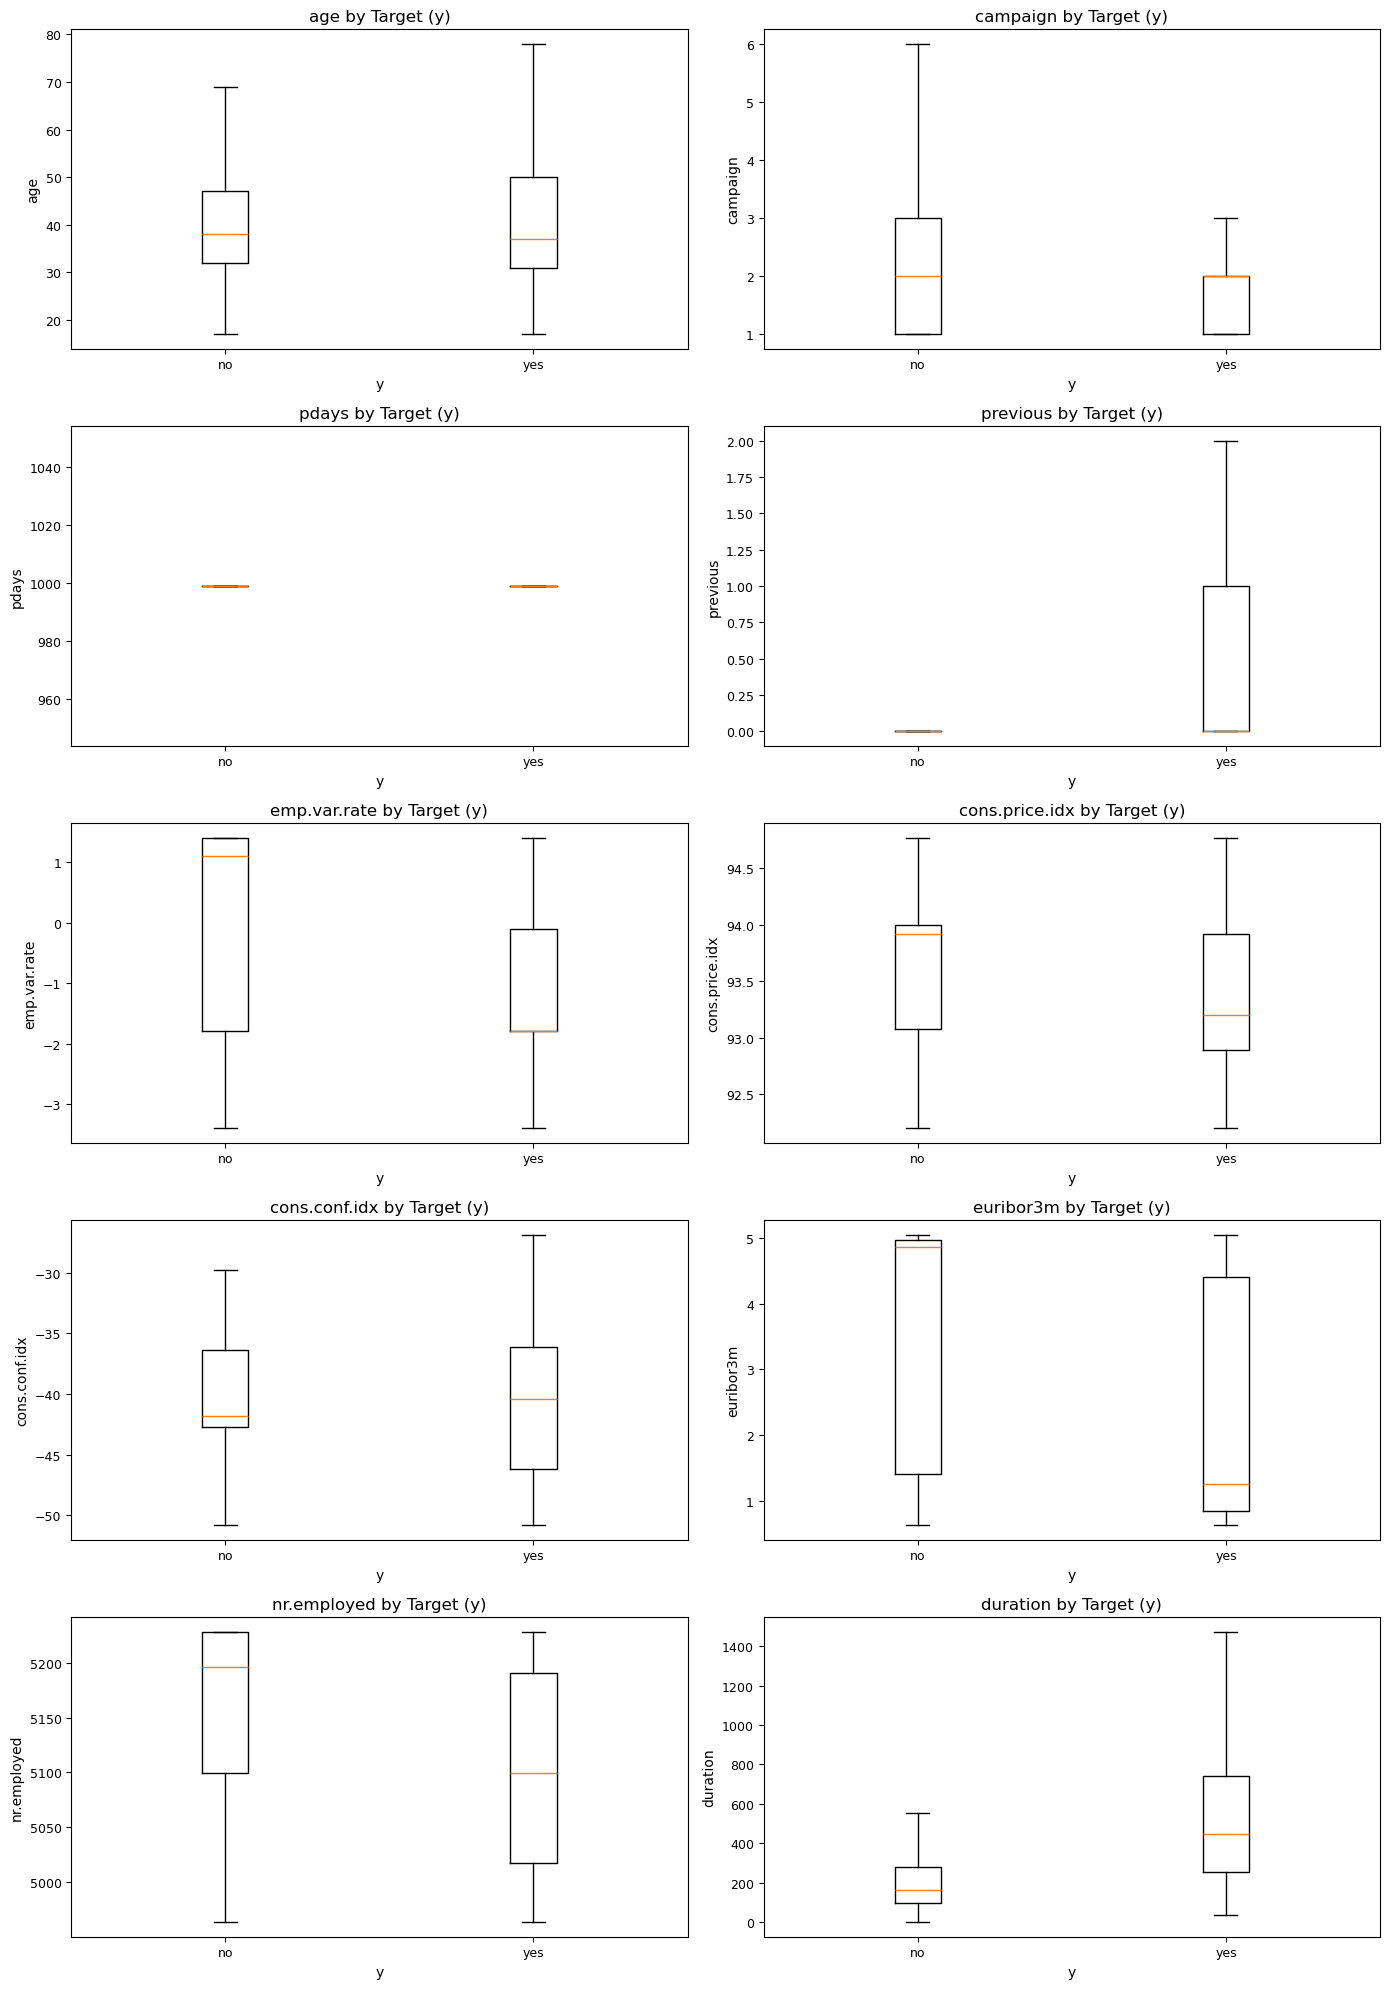

In [63]:
#Data Exploration Visuals

target_col = "y"

categorical_cols = [
    "job", "marital", "education", "default", "housing", "loan",
    "contact", "month", "day_of_week", "poutcome"
]

continuous_cols = [
    "age", "campaign", "pdays", "previous",
    "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed",
    "duration"  # include for EDA; you may drop for modeling
]

# Keep only columns that actually exist in df
categorical_cols = [c for c in categorical_cols if c in df.columns]
continuous_cols = [c for c in continuous_cols if c in df.columns]

# ----------------------------
# 2) Categorical plots: distribution (count) + optional by-target rate
#    Uses subplots when appropriate.
# ----------------------------
def plot_categorical_distributions(df, cols, ncols=2, top_n=12):
    n = len(cols)
    nrows = (n + ncols - 1) // ncols
    fig, axes = plt.subplots(nrows, ncols, figsize=(14, 4 * nrows))
    axes = axes.flatten() if n > 1 else [axes]

    for i, col in enumerate(cols):
        ax = axes[i]
        vc = df[col].astype(str).value_counts(dropna=False)

        # If too many categories, show top N + "OTHER"
        if len(vc) > top_n:
            top = vc.iloc[:top_n]
            other = vc.iloc[top_n:].sum()
            vc_plot = pd.concat([top, pd.Series({"OTHER": other})])
        else:
            vc_plot = vc

        ax.barh(vc_plot.index.astype(str), vc_plot.values)
        ax.set_title(f"Distribution of {col}", fontsize=12)
        ax.set_xlabel("Count", fontsize=10)
        ax.set_ylabel(col, fontsize=10)
        ax.tick_params(axis="y", labelsize=9)
        ax.tick_params(axis="x", labelsize=9)

    # Hide unused axes
    for j in range(i + 1, len(axes)):
        axes[j].axis("off")

    plt.tight_layout()
    plt.show()


def plot_categorical_yes_rate(df, cols, target="y", ncols=2, top_n=12):
    # yes-rate plot is only meaningful if target has 'yes'/'no'
    n = len(cols)
    nrows = (n + ncols - 1) // ncols
    fig, axes = plt.subplots(nrows, ncols, figsize=(14, 4 * nrows))
    axes = axes.flatten() if n > 1 else [axes]

    for i, col in enumerate(cols):
        ax = axes[i]

        tmp = df[[col, target]].copy()
        tmp[col] = tmp[col].astype(str)

        # Compute yes-rate by category
        yes_rate = (tmp[target].astype(str).str.lower() == "yes").groupby(tmp[col]).mean()
        counts = tmp[col].value_counts()

        # If many categories, keep top by count
        if len(counts) > top_n:
            keep = counts.index[:top_n]
            yes_rate = yes_rate.loc[keep]
            counts = counts.loc[keep]

        # Sort by yes-rate for readability
        yes_rate = yes_rate.sort_values()

        ax.barh(yes_rate.index.astype(str), yes_rate.values)
        ax.set_title(f"Yes Rate by {col}", fontsize=12)
        ax.set_xlabel("Proportion Yes", fontsize=10)
        ax.set_ylabel(col, fontsize=10)
        ax.set_xlim(0, max(0.05, min(1.0, yes_rate.max() * 1.15)))
        ax.tick_params(axis="y", labelsize=9)
        ax.tick_params(axis="x", labelsize=9)

    for j in range(i + 1, len(axes)):
        axes[j].axis("off")

    plt.tight_layout()
    plt.show()


# Run categorical plots
plot_categorical_distributions(df, categorical_cols, ncols=2, top_n=12)
plot_categorical_yes_rate(df, categorical_cols, target=target_col, ncols=2, top_n=12)


# ----------------------------
# 3) Continuous plots: histograms + boxplots (scaled/readable)
#    Uses subplots when appropriate.
# ----------------------------
def plot_continuous_histograms(df, cols, ncols=2, bins=30):
    n = len(cols)
    nrows = (n + ncols - 1) // ncols
    fig, axes = plt.subplots(nrows, ncols, figsize=(14, 4 * nrows))
    axes = axes.flatten() if n > 1 else [axes]

    for i, col in enumerate(cols):
        ax = axes[i]
        s = pd.to_numeric(df[col], errors="coerce")

        ax.hist(s.dropna(), bins=bins)
        ax.set_title(f"Histogram of {col}", fontsize=12)
        ax.set_xlabel(col, fontsize=10)
        ax.set_ylabel("Frequency", fontsize=10)
        ax.tick_params(axis="x", labelsize=9)
        ax.tick_params(axis="y", labelsize=9)

    for j in range(i + 1, len(axes)):
        axes[j].axis("off")

    plt.tight_layout()
    plt.show()


def plot_continuous_boxplots_by_target(df, cols, target="y", ncols=2):
    n = len(cols)
    nrows = (n + ncols - 1) // ncols
    fig, axes = plt.subplots(nrows, ncols, figsize=(14, 4 * nrows))
    axes = axes.flatten() if n > 1 else [axes]

    # Split groups
    y_is_yes = df[target].astype(str).str.lower() == "yes"
    grp_no = df.loc[~y_is_yes]
    grp_yes = df.loc[y_is_yes]

    for i, col in enumerate(cols):
        ax = axes[i]
        a = pd.to_numeric(grp_no[col], errors="coerce").dropna()
        b = pd.to_numeric(grp_yes[col], errors="coerce").dropna()

        ax.boxplot([a, b], labels=["no", "yes"], showfliers=False)
        ax.set_title(f"{col} by Target (y)", fontsize=12)
        ax.set_xlabel("y", fontsize=10)
        ax.set_ylabel(col, fontsize=10)
        ax.tick_params(axis="x", labelsize=9)
        ax.tick_params(axis="y", labelsize=9)

    for j in range(i + 1, len(axes)):
        axes[j].axis("off")

    plt.tight_layout()
    plt.show()


# Run continuous plots
plot_continuous_histograms(df, continuous_cols, ncols=2, bins=30)
plot_continuous_boxplots_by_target(df, continuous_cols, target=target_col, ncols=2)

In [ ]:
# Target as binary for testing
df["y_bin"] = (df["y"].str.lower() == "yes").astype(int)

# Split groups
yes_group = df[df["y_bin"] == 1]
no_group  = df[df["y_bin"] == 0]

print("Total samples:", len(df))
print("Yes rate:", df["y_bin"].mean())
print("-" * 60)


# ============================================================
# 1) INFERENTIAL TEST: Continuous Feature (Age) — t-test
# ============================================================
t_stat, p_val = stats.ttest_ind(
    yes_group["age"],
    no_group["age"],
    equal_var=False
)

print("T-test: Age difference between subscribers vs non-subscribers")
print("Mean age (yes):", round(yes_group["age"].mean(), 2))
print("Mean age (no):", round(no_group["age"].mean(), 2))
print("t-statistic:", round(t_stat, 4))
print("p-value:", p_val)

if p_val < 0.05:
    print("Interpretation: Age differs significantly between groups.\n")
else:
    print("Interpretation: No significant age difference.\n")


# ============================================================
# 2) INFERENTIAL TEST: Categorical Feature (poutcome) — Chi-square
# ============================================================
contingency = pd.crosstab(df["poutcome"], df["y"])
chi2, p, dof, expected = stats.chi2_contingency(contingency)

print("Chi-square test: poutcome vs subscription (y)")
print("chi2:", round(chi2, 4))
print("p-value:", p)

if p < 0.05:
    print("Interpretation: Subscription outcome depends on previous campaign outcome.\n")
else:
    print("Interpretation: No significant relationship.\n")


# ============================================================
# 3) INFERENTIAL TEST: Economic Indicator (euribor3m) — t-test
# ============================================================
t_stat, p_val = stats.ttest_ind(
    yes_group["euribor3m"],
    no_group["euribor3m"],
    equal_var=False
)

print("T-test: Euribor rate difference between subscribers vs non-subscribers")
print("Mean euribor3m (yes):", round(yes_group["euribor3m"].mean(), 3))
print("Mean euribor3m (no):", round(no_group["euribor3m"].mean(), 3))
print("t-statistic:", round(t_stat, 4))
print("p-value:", p_val)

if p_val < 0.05:
    print("Interpretation: Euribor rates differ significantly across outcomes.\n")
else:
    print("Interpretation: No significant euribor difference.\n")


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [64]:
y = df["y"].map({"yes": 1, "no": 0})

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

print("\nTarget distribution:")
print("Train yes rate:", y_train.mean())
print("Test yes rate:", y_test.mean())

Training set size: (32950, 22)
Testing set size: (8238, 22)

Target distribution:
Train yes rate: 0.11265553869499241
Test yes rate: 0.11264870114105366


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [65]:
# 89 Percent. Baseline Accuracy=max(P(y=0),P(y=1)). So we need to beat 89% otherwisee always predict no will be better

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [36]:
# ----------------------------
# Logistic Regression Model
# ----------------------------
log_reg_model = Pipeline(steps=[
    ("preprocess", preprocess),   # ColumnTransformer from earlier
    ("model", LogisticRegression(max_iter=2000,))
])

# Train
log_reg_model.fit(X_train, y_train)

# Predict
y_pred = log_reg_model.predict(X_test)
y_proba = log_reg_model.predict_proba(X_test)[:, 1]

# ----------------------------
# Evaluation
# ----------------------------
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Logistic Regression ROC-AUC:", roc_auc_score(y_test, y_proba))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.9002184996358339
Logistic Regression ROC-AUC: 0.7920397925609699

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7310
           1       0.69      0.21      0.32       928

    accuracy                           0.90      8238
   macro avg       0.80      0.60      0.63      8238
weighted avg       0.88      0.90      0.88      8238



### Problem 9: Score the Model

What is the accuracy of your model?

In [67]:
90

90

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [66]:
# ----------------------------
# Define models (default settings)
# ----------------------------
models = {
    "Logistic Regression": LogisticRegression(max_iter=2000),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC()
}

results = []

# ----------------------------
# Train + Evaluate each model
# ----------------------------
for name, clf in models.items():

    pipe = Pipeline(steps=[
        ("preprocess", preprocess),  # your ColumnTransformer
        ("model", clf)
    ])

    # ---- Train timing ----
    start = time.time()
    pipe.fit(X_train, y_train)
    train_time = time.time() - start

    # ---- Accuracy scores ----
    train_pred = pipe.predict(X_train)
    test_pred = pipe.predict(X_test)

    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)

    results.append({
        "Model": name,
        "Train Time (s)": round(train_time, 4),
        "Train Accuracy": round(train_acc, 4),
        "Test Accuracy": round(test_acc, 4)
    })

# ----------------------------
# Results DataFrame
# ----------------------------
results_df = pd.DataFrame(results)

print(results_df)


                 Model  Train Time (s)  Train Accuracy  Test Accuracy
0  Logistic Regression          0.1186          0.8992         0.9002
1                  KNN          0.0593          0.9136         0.8962
2        Decision Tree          0.2201          0.9948         0.8412
3                  SVM         24.0748          0.9050         0.9028


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.


- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [42]:
# Requires: X_train, X_test, y_train, y_test, preprocess
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
SCORING = "accuracy"

tuning_rows = []
best_models = {}


In [43]:
# ----------------------------
# SECTION 1 — Logistic Regression Grid Search
# ----------------------------
lr_pipe = Pipeline([
    ("preprocess", preprocess),
    ("model", LogisticRegression(max_iter=5000))
])

lr_grid = {
    "model__C": [0.01, 0.1, 1, 10, 100],
    "model__solver": ["lbfgs"],
    "model__penalty": ["l2"],
}

lr_gs = GridSearchCV(
    lr_pipe, lr_grid,
    scoring=SCORING,
    cv=cv,
    n_jobs=-1,
    refit=True
)

start = time.time()
lr_gs.fit(X_train, y_train)
lr_time = time.time() - start

lr_best = lr_gs.best_estimator_
best_models["Logistic Regression"] = lr_best

tuning_rows.append({
    "Model": "Logistic Regression",
    "Grid Fit Time (s)": round(lr_time, 4),
    "Best CV Accuracy": round(lr_gs.best_score_, 4),
    "Train Accuracy": round(accuracy_score(y_train, lr_best.predict(X_train)), 4),
    "Test Accuracy": round(accuracy_score(y_test, lr_best.predict(X_test)), 4),
    "Best Params": lr_gs.best_params_,
})


In [44]:
# ----------------------------
# SECTION 2 — KNN Grid Search
# ----------------------------
knn_pipe = Pipeline([
    ("preprocess", preprocess),
    ("model", KNeighborsClassifier())
])

knn_grid = {
    "model__n_neighbors": [5, 11, 21, 41, 81],
    "model__weights": ["uniform", "distance"],
    "model__p": [1, 2],
}

knn_gs = GridSearchCV(
    knn_pipe, knn_grid,
    scoring=SCORING,
    cv=cv,
    n_jobs=-1,
    refit=True
)

start = time.time()
knn_gs.fit(X_train, y_train)
knn_time = time.time() - start

knn_best = knn_gs.best_estimator_
best_models["KNN"] = knn_best

tuning_rows.append({
    "Model": "KNN",
    "Grid Fit Time (s)": round(knn_time, 4),
    "Best CV Accuracy": round(knn_gs.best_score_, 4),
    "Train Accuracy": round(accuracy_score(y_train, knn_best.predict(X_train)), 4),
    "Test Accuracy": round(accuracy_score(y_test, knn_best.predict(X_test)), 4),
    "Best Params": knn_gs.best_params_,
})


In [45]:
# ----------------------------
# SECTION 3 — Decision Tree Grid Search
# ----------------------------
dt_pipe = Pipeline([
    ("preprocess", preprocess),
    ("model", DecisionTreeClassifier(random_state=42))
])

dt_grid = {
    "model__max_depth": [3, 5, 8, 12, 20, None],
    "model__min_samples_leaf": [1, 5, 10, 25, 50],
    "model__min_samples_split": [2, 10, 25, 50, 100],
}

dt_gs = GridSearchCV(
    dt_pipe, dt_grid,
    scoring=SCORING,
    cv=cv,
    n_jobs=-1,
    refit=True
)

start = time.time()
dt_gs.fit(X_train, y_train)
dt_time = time.time() - start

dt_best = dt_gs.best_estimator_
best_models["Decision Tree"] = dt_best

tuning_rows.append({
    "Model": "Decision Tree",
    "Grid Fit Time (s)": round(dt_time, 4),
    "Best CV Accuracy": round(dt_gs.best_score_, 4),
    "Train Accuracy": round(accuracy_score(y_train, dt_best.predict(X_train)), 4),
    "Test Accuracy": round(accuracy_score(y_test, dt_best.predict(X_test)), 4),
    "Best Params": dt_gs.best_params_,
})


In [46]:
# ----------------------------
# SECTION 4 — SVM (RBF) Grid Search (smaller = faster)
# ----------------------------
svm_pipe = Pipeline([
    ("preprocess", preprocess),
    ("model", SVC())
])

# Smaller grid to avoid long runtimes
svm_grid = {
    "model__kernel": ["rbf"],
    "model__C": [0.1, 1, 10],
    "model__gamma": ["scale", "auto"],  # keep tight
}

svm_gs = GridSearchCV(
    svm_pipe, svm_grid,
    scoring=SCORING,
    cv=cv,
    n_jobs=-1,
    refit=True
)

start = time.time()
svm_gs.fit(X_train, y_train)
svm_time = time.time() - start

svm_best = svm_gs.best_estimator_
best_models["SVM (RBF)"] = svm_best

tuning_rows.append({
    "Model": "SVM (RBF)",
    "Grid Fit Time (s)": round(svm_time, 4),
    "Best CV Accuracy": round(svm_gs.best_score_, 4),
    "Train Accuracy": round(accuracy_score(y_train, svm_best.predict(X_train)), 4),
    "Test Accuracy": round(accuracy_score(y_test, svm_best.predict(X_test)), 4),
    "Best Params": svm_gs.best_params_,
})


In [47]:
# ----------------------------
# SECTION 5 — Results DataFrame
# ----------------------------
results_tuned = pd.DataFrame(tuning_rows).sort_values("Test Accuracy", ascending=False)

# Assignment-style minimal view:
results_tuned_simple = results_tuned[["Model", "Grid Fit Time (s)", "Train Accuracy", "Test Accuracy"]]

print(results_tuned_simple)
print("\nFull details:\n")
print(results_tuned)


                 Model  Grid Fit Time (s)  Train Accuracy  Test Accuracy
3            SVM (RBF)           148.6008          0.9050         0.9028
2        Decision Tree            14.5982          0.9020         0.9020
1                  KNN            23.1468          0.8999         0.9019
0  Logistic Regression             3.9122          0.9000         0.9003

Full details:

                 Model  Grid Fit Time (s)  Best CV Accuracy  Train Accuracy  \
3            SVM (RBF)           148.6008            0.8998          0.9050   
2        Decision Tree            14.5982            0.8996          0.9020   
1                  KNN            23.1468            0.8992          0.8999   
0  Logistic Regression             3.9122            0.8998          0.9000   

   Test Accuracy                                        Best Params  
3         0.9028  {'model__C': 1, 'model__gamma': 'scale', 'mode...  
2         0.9020  {'model__max_depth': 5, 'model__min_samples_le...  
1         0.9

##### Questions